# Dense Neural Networks Versjon 2.0

Forsøk nummer 2.

#### Importering av biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
#import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

#### Innlasting av datasett

In [2]:
# TEK (1. Spetember til 18. Desember)
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)
    #df_tek.info()

# TEK (delayed 2 hours)
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)
    #df_tek_delayed.info()

# AROME Værdata (1. Spetember til 18. Desember)
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)
    #df_arome.info()

#### Samling av datasett

In [3]:
df_arome['production_delayed_2_hours'] = df_tek_delayed['YVIK-YtreVikna1-Sum-produksjon']

In [4]:
df = pd.concat([df_arome['/arome_airtemp_6491_1087'],
                df_arome['/arome_airpress_6491_1087'], 
                df_arome['/arome_winddir_6491_1087'],
                df_arome['/arome_windvel_6491_1087'],
                df_arome['production_delayed_2_hours'],
                df_tek['YVIK-YtreVikna1-Sum-produksjon']
               ], 
               axis = 1)

#### Vaske sammenstilt data

In [5]:
cleaned_dataframe = df.dropna()

In [6]:
cleaned_dataframe.count()

/arome_airtemp_6491_1087          2525
/arome_airpress_6491_1087         2525
/arome_winddir_6491_1087          2525
/arome_windvel_6491_1087          2525
production_delayed_2_hours        2525
YVIK-YtreVikna1-Sum-produksjon    2525
dtype: int64

In [7]:
#cleaned_dataframe.count()

In [8]:
# Grafisk visualisering utgår. se heller Lineær Regresjon Versjon 2.0

#### Dele datasett i et X- og Y-datasett

In [9]:
x = cleaned_dataframe[['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087','/arome_winddir_6491_1087', '/arome_windvel_6491_1087','production_delayed_2_hours' ]]
y = cleaned_dataframe['YVIK-YtreVikna1-Sum-produksjon']

#### Train/Test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

#### Skalere feature data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)

In [16]:
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

## Lage og trene modellen ( TensorFlow )

In [17]:
import tensorflow as tf

#### Lage feature columns

In [18]:
cleaned_dataframe.columns

Index(['/arome_airtemp_6491_1087', '/arome_airpress_6491_1087',
       '/arome_winddir_6491_1087', '/arome_windvel_6491_1087',
       'production_delayed_2_hours', 'YVIK-YtreVikna1-Sum-produksjon'],
      dtype='object')

In [19]:
airtemp = tf.feature_column.numeric_column('/arome_airtemp_6491_1087')
airpress = tf.feature_column.numeric_column('/arome_airpress_6491_1087')
winddir = tf.feature_column.numeric_column('/arome_winddir_6491_1087')
windvel = tf.feature_column.numeric_column('/arome_windvel_6491_1087')
prev_prod = tf.feature_column.numeric_column('production_delayed_2_hours')

In [20]:
feat_cols = [airtemp,airpress,winddir,windvel, prev_prod]

#### Create the input function for the estimator object. (play around with batch_size and num_epochs)

In [21]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train ,batch_size=25,num_epochs=2000,
                                            shuffle=True)

#### Create the estimator model. Use a DNNRegressor. Play around with the hidden units!

In [22]:
model = tf.estimator.DNNRegressor(hidden_units=[5,10,20,25,20,10],feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_tf_random_seed': 1, '_save_summary_steps': 100, '_model_dir': 'C:\\Users\\chris\\AppData\\Local\\Temp\\tmpeega93ej'}


#### Train the model for ~1,000 steps. (Later come back to this and train it for more and check for improvement)

In [23]:
model.train(input_fn=input_func,steps=100000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\chris\AppData\Local\Temp\tmpeega93ej\model.ckpt.
INFO:tensorflow:step = 1, loss = 12574.2
INFO:tensorflow:global_step/sec: 329.817
INFO:tensorflow:step = 101, loss = 544.067 (0.287 sec)
INFO:tensorflow:global_step/sec: 391.786
INFO:tensorflow:step = 201, loss = 503.5 (0.273 sec)
INFO:tensorflow:global_step/sec: 364.542
INFO:tensorflow:step = 301, loss = 464.322 (0.263 sec)
INFO:tensorflow:global_step/sec: 400.555
INFO:tensorflow:step = 401, loss = 464.26 (0.248 sec)
INFO:tensorflow:global_step/sec: 357.748
INFO:tensorflow:step = 501, loss = 679.548 (0.291 sec)
INFO:tensorflow:global_step/sec: 350.856
INFO:tensorflow:step = 601, loss = 624.832 (0.269 sec)
INFO:tensorflow:global_step/sec: 394.211
INFO:tensorflow:step = 701, loss = 611.106 (0.253 sec)
INFO:tensorflow:global_step/sec: 362.655
INFO:tensorflow:step = 801, loss = 459.134 (0.276 sec)
INFO:tensorflow:global_step/sec: 377.767
INFO:

INFO:tensorflow:global_step/sec: 432.978
INFO:tensorflow:step = 8401, loss = 268.018 (0.225 sec)
INFO:tensorflow:global_step/sec: 420.09
INFO:tensorflow:step = 8501, loss = 281.342 (0.249 sec)
INFO:tensorflow:global_step/sec: 342.288
INFO:tensorflow:step = 8601, loss = 396.546 (0.275 sec)
INFO:tensorflow:global_step/sec: 359.086
INFO:tensorflow:step = 8701, loss = 366.275 (0.287 sec)
INFO:tensorflow:global_step/sec: 394.255
INFO:tensorflow:step = 8801, loss = 444.785 (0.251 sec)
INFO:tensorflow:global_step/sec: 389.619
INFO:tensorflow:step = 8901, loss = 198.701 (0.261 sec)
INFO:tensorflow:global_step/sec: 378.723
INFO:tensorflow:step = 9001, loss = 511.901 (0.255 sec)
INFO:tensorflow:global_step/sec: 412.426
INFO:tensorflow:step = 9101, loss = 473.46 (0.249 sec)
INFO:tensorflow:global_step/sec: 370.924
INFO:tensorflow:step = 9201, loss = 823.291 (0.262 sec)
INFO:tensorflow:global_step/sec: 399.523
INFO:tensorflow:step = 9301, loss = 485.478 (0.266 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 678.16
INFO:tensorflow:step = 16801, loss = 428.631 (0.149 sec)
INFO:tensorflow:global_step/sec: 697.816
INFO:tensorflow:step = 16901, loss = 665.981 (0.142 sec)
INFO:tensorflow:global_step/sec: 618.319
INFO:tensorflow:step = 17001, loss = 489.344 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.182
INFO:tensorflow:step = 17101, loss = 452.538 (0.162 sec)
INFO:tensorflow:global_step/sec: 629.024
INFO:tensorflow:step = 17201, loss = 349.649 (0.160 sec)
INFO:tensorflow:global_step/sec: 563.263
INFO:tensorflow:step = 17301, loss = 607.904 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.269
INFO:tensorflow:step = 17401, loss = 388.89 (0.185 sec)
INFO:tensorflow:global_step/sec: 596.058
INFO:tensorflow:step = 17501, loss = 458.597 (0.166 sec)
INFO:tensorflow:global_step/sec: 529.723
INFO:tensorflow:step = 17601, loss = 450.87 (0.190 sec)
INFO:tensorflow:global_step/sec: 527.888
INFO:tensorflow:step = 17701, loss = 457.772 (0.187 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 315.966
INFO:tensorflow:step = 25201, loss = 441.725 (0.332 sec)
INFO:tensorflow:global_step/sec: 307.192
INFO:tensorflow:step = 25301, loss = 467.787 (0.310 sec)
INFO:tensorflow:global_step/sec: 422.412
INFO:tensorflow:step = 25401, loss = 369.836 (0.253 sec)
INFO:tensorflow:global_step/sec: 332.767
INFO:tensorflow:step = 25501, loss = 459.386 (0.285 sec)
INFO:tensorflow:global_step/sec: 364.234
INFO:tensorflow:step = 25601, loss = 369.367 (0.282 sec)
INFO:tensorflow:global_step/sec: 370.365
INFO:tensorflow:step = 25701, loss = 476.198 (0.267 sec)
INFO:tensorflow:global_step/sec: 371.784
INFO:tensorflow:step = 25801, loss = 307.199 (0.268 sec)
INFO:tensorflow:global_step/sec: 353.177
INFO:tensorflow:step = 25901, loss = 487.036 (0.295 sec)
INFO:tensorflow:global_step/sec: 321.637
INFO:tensorflow:step = 26001, loss = 459.886 (0.295 sec)
INFO:tensorflow:global_step/sec: 370.867
INFO:tensorflow:step = 26101, loss = 608.819 (0.289 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 428.143
INFO:tensorflow:step = 33601, loss = 414.556 (0.234 sec)
INFO:tensorflow:global_step/sec: 549.461
INFO:tensorflow:step = 33701, loss = 494.51 (0.181 sec)
INFO:tensorflow:global_step/sec: 414.35
INFO:tensorflow:step = 33801, loss = 361.148 (0.247 sec)
INFO:tensorflow:global_step/sec: 371.903
INFO:tensorflow:step = 33901, loss = 423.665 (0.266 sec)
INFO:tensorflow:global_step/sec: 371.784
INFO:tensorflow:step = 34001, loss = 294.582 (0.276 sec)
INFO:tensorflow:global_step/sec: 307.617
INFO:tensorflow:step = 34101, loss = 881.891 (0.326 sec)
INFO:tensorflow:global_step/sec: 408.952
INFO:tensorflow:step = 34201, loss = 573.637 (0.237 sec)
INFO:tensorflow:global_step/sec: 381.232
INFO:tensorflow:step = 34301, loss = 271.267 (0.261 sec)
INFO:tensorflow:global_step/sec: 394.147
INFO:tensorflow:step = 34401, loss = 531.326 (0.262 sec)
INFO:tensorflow:global_step/sec: 343.218
INFO:tensorflow:step = 34501, loss = 357.303 (0.280 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 400.758
INFO:tensorflow:step = 42001, loss = 334.985 (0.248 sec)
INFO:tensorflow:global_step/sec: 407.689
INFO:tensorflow:step = 42101, loss = 371.498 (0.245 sec)
INFO:tensorflow:global_step/sec: 375.977
INFO:tensorflow:step = 42201, loss = 461.331 (0.279 sec)
INFO:tensorflow:global_step/sec: 362.455
INFO:tensorflow:step = 42301, loss = 353.172 (0.262 sec)
INFO:tensorflow:global_step/sec: 414.141
INFO:tensorflow:step = 42401, loss = 222.978 (0.253 sec)
INFO:tensorflow:global_step/sec: 349.919
INFO:tensorflow:step = 42501, loss = 268.549 (0.270 sec)
INFO:tensorflow:global_step/sec: 379.715
INFO:tensorflow:step = 42601, loss = 166.241 (0.280 sec)
INFO:tensorflow:global_step/sec: 369.784
INFO:tensorflow:step = 42701, loss = 326.854 (0.253 sec)
INFO:tensorflow:global_step/sec: 357.85
INFO:tensorflow:step = 42801, loss = 324.692 (0.288 sec)
INFO:tensorflow:global_step/sec: 389.699
INFO:tensorflow:step = 42901, loss = 282.483 (0.248 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 378.171
INFO:tensorflow:step = 50401, loss = 445.991 (0.265 sec)
INFO:tensorflow:global_step/sec: 338.604
INFO:tensorflow:step = 50501, loss = 154.402 (0.283 sec)
INFO:tensorflow:global_step/sec: 392.269
INFO:tensorflow:step = 50601, loss = 402.289 (0.252 sec)
INFO:tensorflow:global_step/sec: 350.079
INFO:tensorflow:step = 50701, loss = 457.072 (0.285 sec)
INFO:tensorflow:global_step/sec: 413.423
INFO:tensorflow:step = 50801, loss = 533.253 (0.261 sec)
INFO:tensorflow:global_step/sec: 383.32
INFO:tensorflow:step = 50901, loss = 476.771 (0.258 sec)
INFO:tensorflow:global_step/sec: 346.329
INFO:tensorflow:step = 51001, loss = 318.62 (0.277 sec)
INFO:tensorflow:global_step/sec: 352.864
INFO:tensorflow:step = 51101, loss = 572.807 (0.279 sec)
INFO:tensorflow:global_step/sec: 381.26
INFO:tensorflow:step = 51201, loss = 216.081 (0.278 sec)
INFO:tensorflow:global_step/sec: 359.035
INFO:tensorflow:step = 51301, loss = 176.317 (0.263 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 394.435
INFO:tensorflow:step = 58801, loss = 410.468 (0.246 sec)
INFO:tensorflow:global_step/sec: 435.485
INFO:tensorflow:step = 58901, loss = 374.186 (0.228 sec)
INFO:tensorflow:global_step/sec: 363.26
INFO:tensorflow:step = 59001, loss = 504.327 (0.269 sec)
INFO:tensorflow:global_step/sec: 377.788
INFO:tensorflow:step = 59101, loss = 255.374 (0.283 sec)
INFO:tensorflow:global_step/sec: 355.235
INFO:tensorflow:step = 59201, loss = 230.161 (0.280 sec)
INFO:tensorflow:global_step/sec: 366.657
INFO:tensorflow:step = 59301, loss = 817.746 (0.256 sec)
INFO:tensorflow:global_step/sec: 357.943
INFO:tensorflow:step = 59401, loss = 665.086 (0.281 sec)
INFO:tensorflow:global_step/sec: 373.663
INFO:tensorflow:step = 59501, loss = 280.86 (0.281 sec)
INFO:tensorflow:global_step/sec: 380.317
INFO:tensorflow:step = 59601, loss = 509.315 (0.265 sec)
INFO:tensorflow:global_step/sec: 347.744
INFO:tensorflow:step = 59701, loss = 965.213 (0.270 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 439.023
INFO:tensorflow:step = 67201, loss = 287.174 (0.228 sec)
INFO:tensorflow:global_step/sec: 395.383
INFO:tensorflow:step = 67301, loss = 544.717 (0.264 sec)
INFO:tensorflow:global_step/sec: 349.301
INFO:tensorflow:step = 67401, loss = 381.555 (0.286 sec)
INFO:tensorflow:global_step/sec: 432.926
INFO:tensorflow:step = 67501, loss = 365.993 (0.220 sec)
INFO:tensorflow:global_step/sec: 459.582
INFO:tensorflow:step = 67601, loss = 459.532 (0.219 sec)
INFO:tensorflow:global_step/sec: 415.103
INFO:tensorflow:step = 67701, loss = 634.39 (0.254 sec)
INFO:tensorflow:global_step/sec: 359.166
INFO:tensorflow:step = 67801, loss = 366.258 (0.266 sec)
INFO:tensorflow:global_step/sec: 486.518
INFO:tensorflow:step = 67901, loss = 773.84 (0.210 sec)
INFO:tensorflow:global_step/sec: 392.162
INFO:tensorflow:step = 68001, loss = 438.041 (0.261 sec)
INFO:tensorflow:global_step/sec: 385.563
INFO:tensorflow:step = 68101, loss = 163.692 (0.243 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 392.419
INFO:tensorflow:step = 75601, loss = 251.447 (0.271 sec)
INFO:tensorflow:global_step/sec: 374.057
INFO:tensorflow:step = 75701, loss = 327.389 (0.267 sec)
INFO:tensorflow:global_step/sec: 357.26
INFO:tensorflow:step = 75801, loss = 380.584 (0.280 sec)
INFO:tensorflow:global_step/sec: 359.287
INFO:tensorflow:step = 75901, loss = 850.096 (0.263 sec)
INFO:tensorflow:global_step/sec: 357.546
INFO:tensorflow:step = 76001, loss = 190.13 (0.280 sec)
INFO:tensorflow:global_step/sec: 389.293
INFO:tensorflow:step = 76101, loss = 625.051 (0.267 sec)
INFO:tensorflow:global_step/sec: 407.295
INFO:tensorflow:step = 76201, loss = 889.87 (0.241 sec)
INFO:tensorflow:global_step/sec: 392.204
INFO:tensorflow:step = 76301, loss = 245.597 (0.254 sec)
INFO:tensorflow:global_step/sec: 394.021
INFO:tensorflow:step = 76401, loss = 372.653 (0.255 sec)
INFO:tensorflow:global_step/sec: 403.402
INFO:tensorflow:step = 76501, loss = 123.955 (0.248 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 395.29
INFO:tensorflow:step = 84001, loss = 410.071 (0.252 sec)
INFO:tensorflow:global_step/sec: 339.88
INFO:tensorflow:step = 84101, loss = 355.36 (0.295 sec)
INFO:tensorflow:global_step/sec: 337.27
INFO:tensorflow:step = 84201, loss = 324.698 (0.281 sec)
INFO:tensorflow:global_step/sec: 386.708
INFO:tensorflow:step = 84301, loss = 189.184 (0.274 sec)
INFO:tensorflow:global_step/sec: 365.48
INFO:tensorflow:step = 84401, loss = 391.41 (0.258 sec)
INFO:tensorflow:global_step/sec: 382.687
INFO:tensorflow:step = 84501, loss = 358.556 (0.277 sec)
INFO:tensorflow:global_step/sec: 340.023
INFO:tensorflow:step = 84601, loss = 356.39 (0.280 sec)
INFO:tensorflow:global_step/sec: 369.553
INFO:tensorflow:step = 84701, loss = 774.488 (0.270 sec)
INFO:tensorflow:global_step/sec: 387.98
INFO:tensorflow:step = 84801, loss = 346.024 (0.273 sec)
INFO:tensorflow:global_step/sec: 326.278
INFO:tensorflow:step = 84901, loss = 671.22 (0.308 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 409.752
INFO:tensorflow:step = 92401, loss = 260.812 (0.260 sec)
INFO:tensorflow:global_step/sec: 343.311
INFO:tensorflow:step = 92501, loss = 1000.84 (0.276 sec)
INFO:tensorflow:global_step/sec: 375.885
INFO:tensorflow:step = 92601, loss = 457.377 (0.282 sec)
INFO:tensorflow:global_step/sec: 423.486
INFO:tensorflow:step = 92701, loss = 222.337 (0.240 sec)
INFO:tensorflow:global_step/sec: 353.694
INFO:tensorflow:step = 92801, loss = 285.3 (0.280 sec)
INFO:tensorflow:global_step/sec: 343.43
INFO:tensorflow:step = 92901, loss = 498.931 (0.274 sec)
INFO:tensorflow:global_step/sec: 355.16
INFO:tensorflow:step = 93001, loss = 522.08 (0.282 sec)
INFO:tensorflow:global_step/sec: 385.631
INFO:tensorflow:step = 93101, loss = 146.494 (0.276 sec)
INFO:tensorflow:global_step/sec: 364.221
INFO:tensorflow:step = 93201, loss = 319.967 (0.260 sec)
INFO:tensorflow:global_step/sec: 367.233
INFO:tensorflow:step = 93301, loss = 341.593 (0.270 sec)
INFO:tensorflow:global_st

#### Create a prediction input function and then use the .predict method off your estimator model to create a list or predictions on your test data.

In [24]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [25]:
pred_gen = model.predict(predict_input_func)

In [26]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from C:\Users\chris\AppData\Local\Temp\tmpeega93ej\model.ckpt-100000


 #### Evaluere modellen

In [27]:
from sklearn import metrics

In [28]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions'])

In [29]:
# 100 00 treningsrunder [5,10,20,25,20,10]
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.11862978652
Mean Squared Error: 			 19.2073953817
Root Mean Squared Error: 		 4.38262425742


#### Visualsering av funn

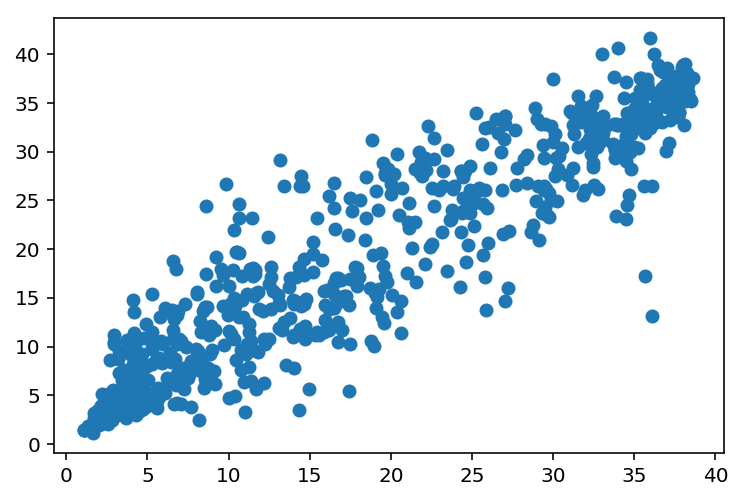

In [30]:
# Burde følge en rett linje

plt.scatter(y_test,final_preds)

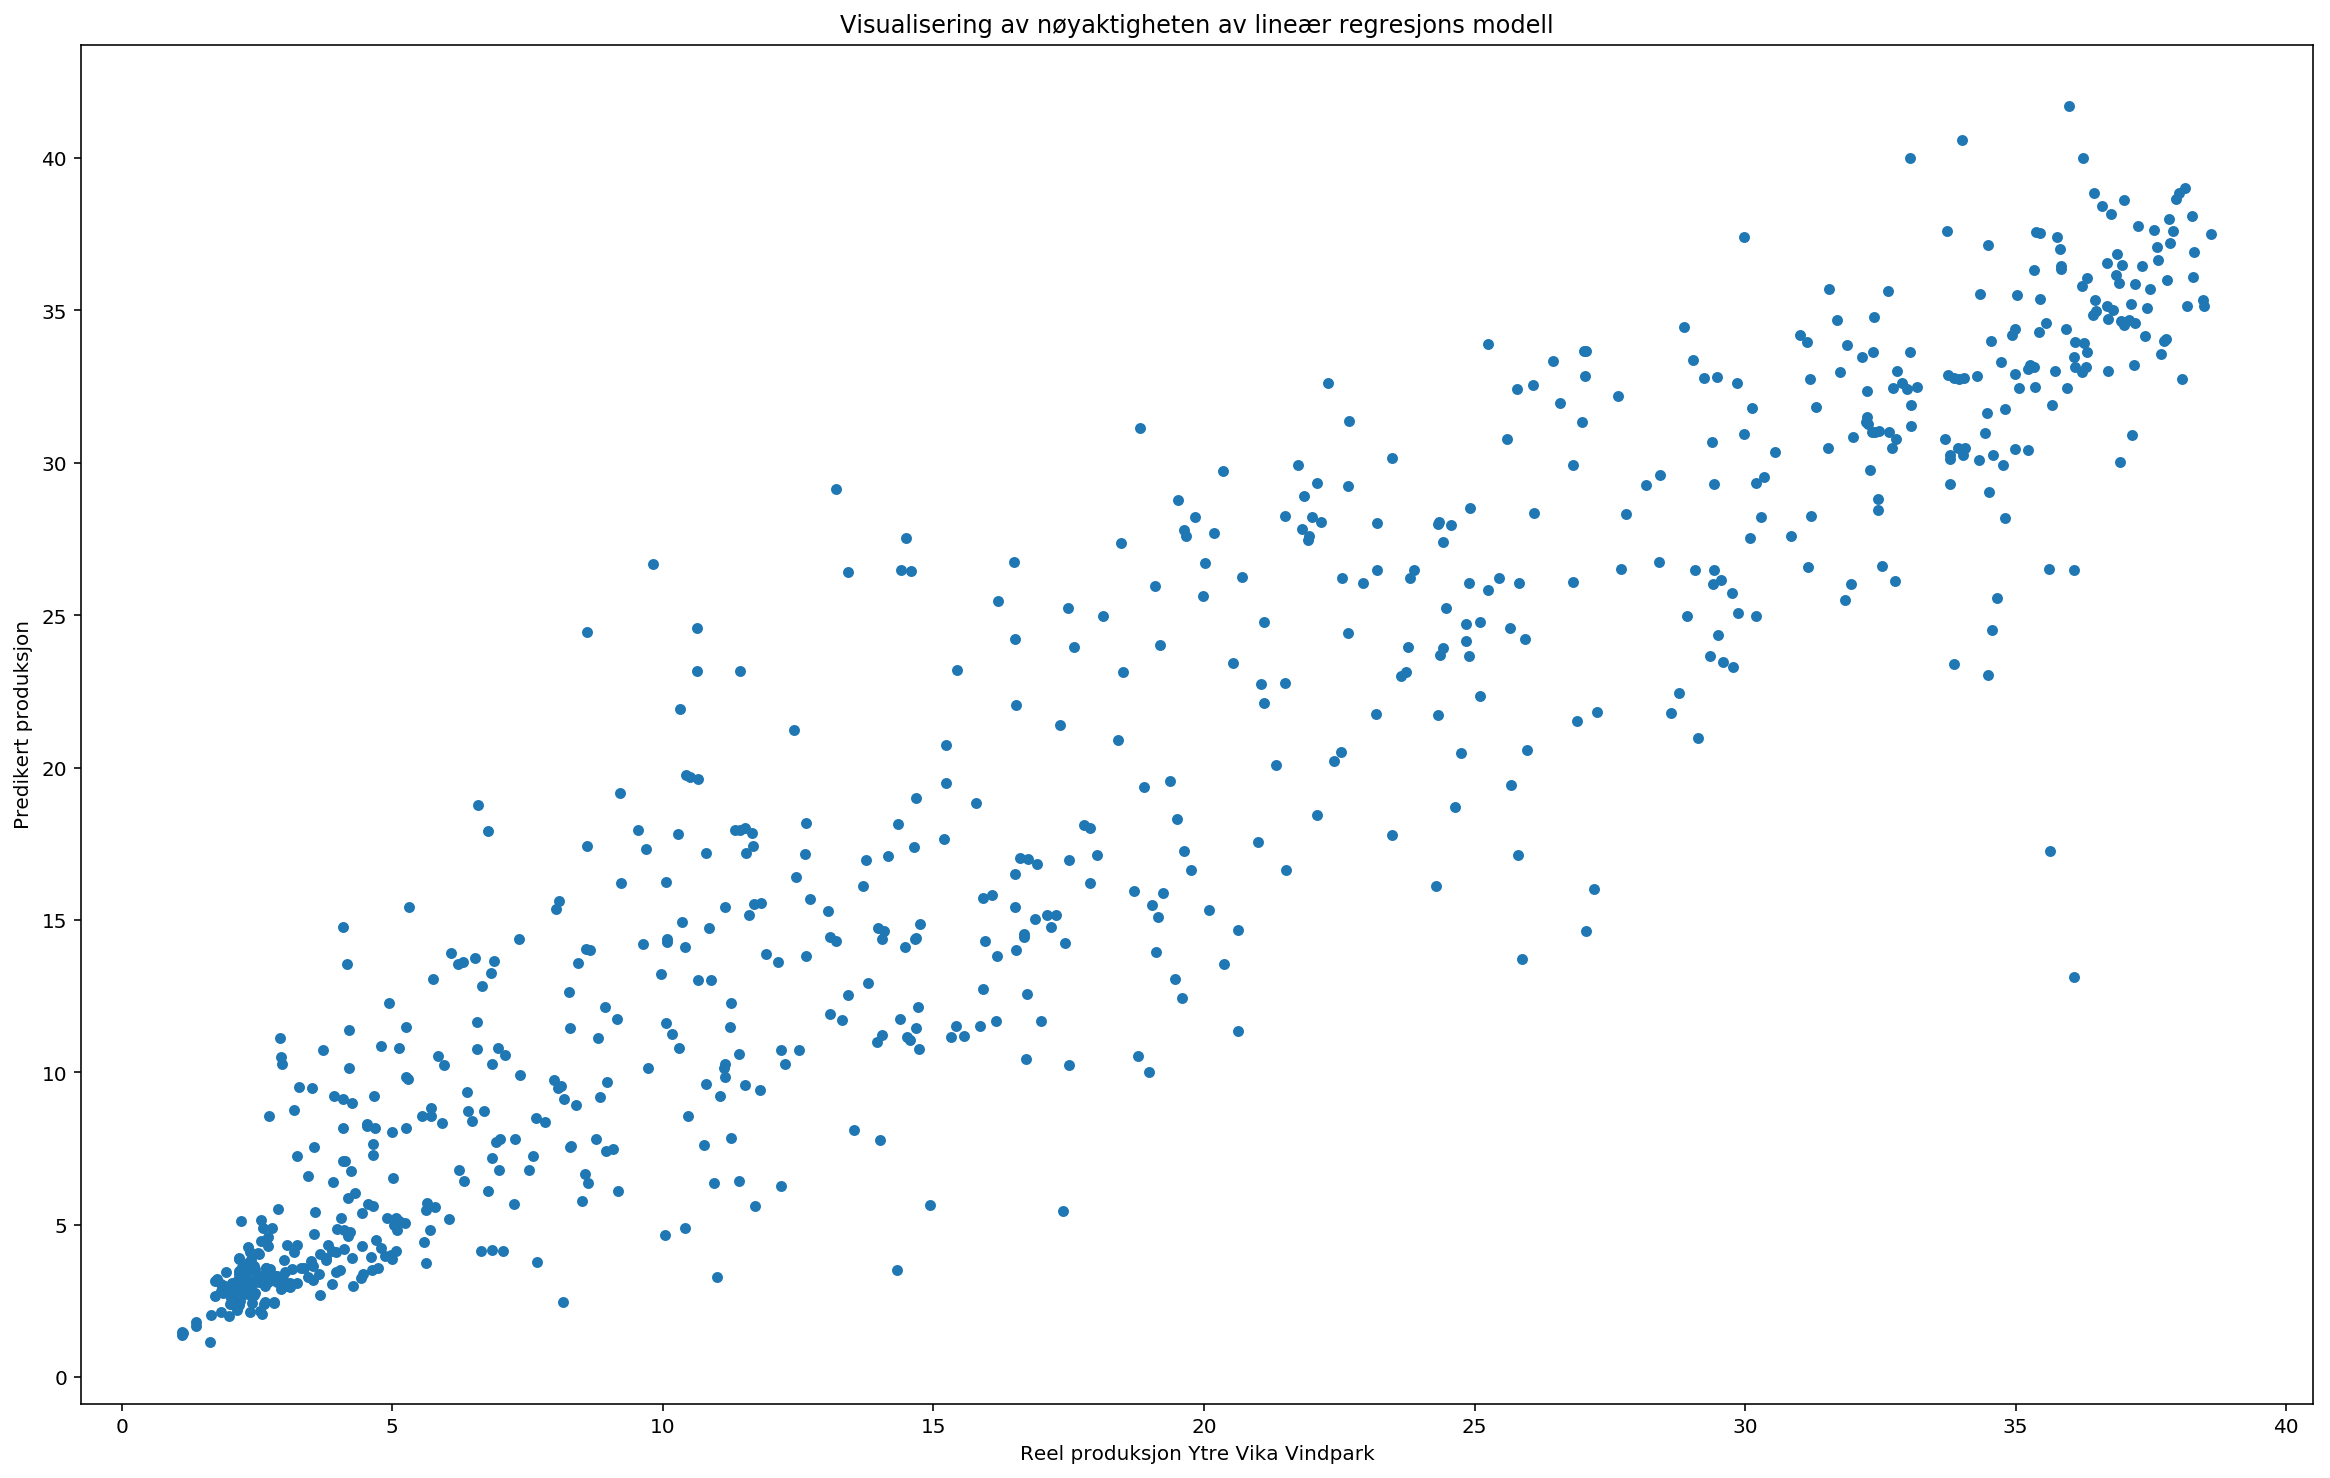

In [31]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

In [32]:
comp = pd.DataFrame(data = {'real': y_test,'pred': final_preds})

4.261416435241699

In [33]:
comp['DNN_pred'] = comp['pred'].apply(lambda x: float(x))

In [34]:
comp.head()

,pred,real,DNN_pred
2165,[3.62401],2.226000,3.624012
1891,[3.92361],3.772117,3.923608
787,[2.42165],2.821000,2.421651
1403,[38.8704],36.440514,38.870399
323,[2.35081],2.168000,2.350814


In [78]:
comp.count()

pred    758
real    758
new     758
dtype: int64

In [35]:
comp.reset_index(inplace=True)

In [75]:
#comp.sort_index(inplace=True)

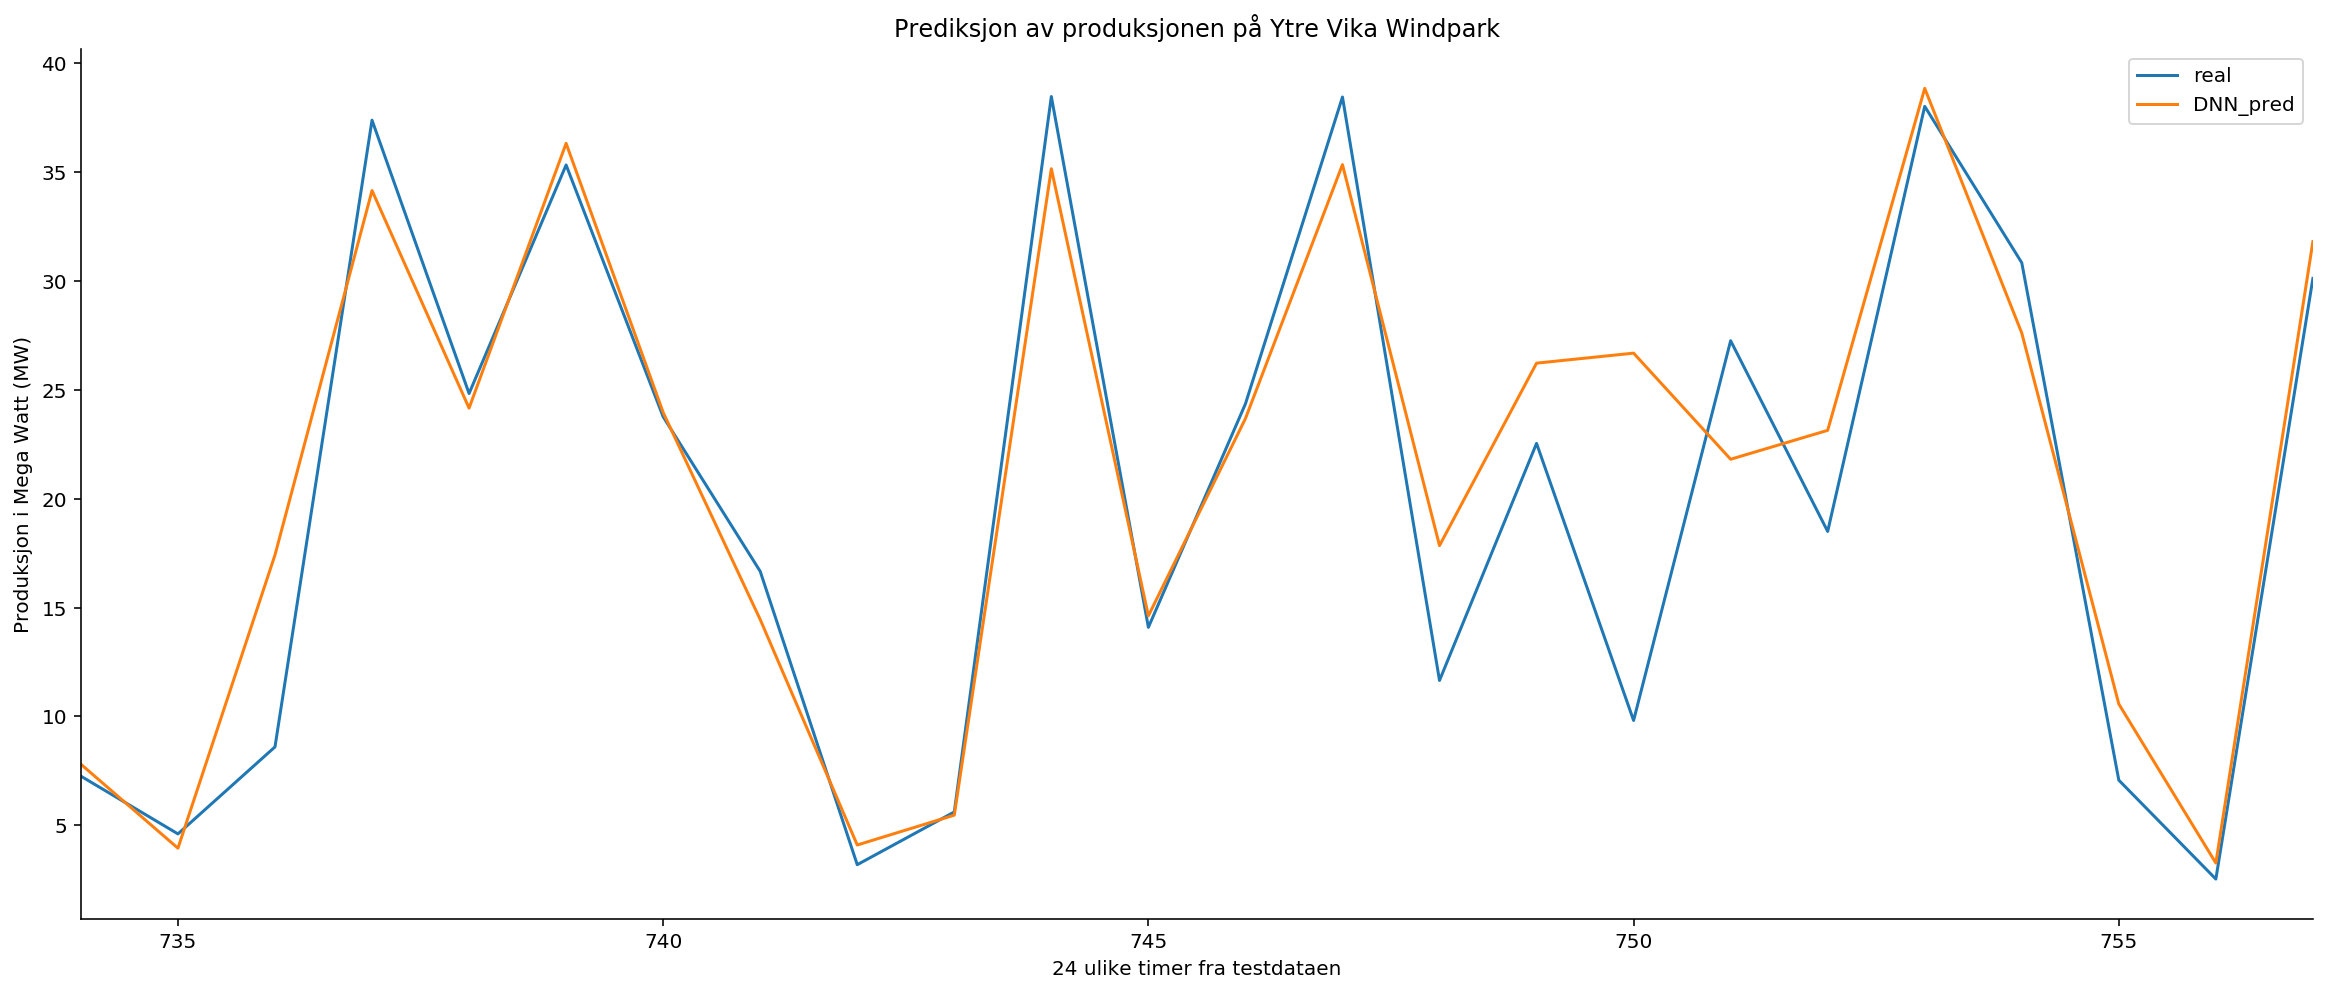

In [36]:
ax = comp['real'].tail(24).plot(figsize=(20,8))
ax = comp['DNN_pred'].tail(24).plot(figsize=(20,8))

plt.xlabel('24 ulike timer fra testdataen')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Prediksjon av produksjonen på Ytre Vika Windpark')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
fig.savefig('24_punkter.png')

In [95]:
comp.head()

,index,pred,real,DNN_pred,diff
0,2165,[3.67454],2.226000,3.674543,1.448543
1,1891,[3.78226],3.772117,3.782264,0.010147
2,787,[2.74918],2.821000,2.749177,-0.071823
3,1403,[38.5844],36.440514,38.584393,2.143878
4,323,[2.34894],2.168000,2.348943,0.180943


In [94]:
comp['diff'] = comp['DNN_pred']-comp['real']

In [96]:
comp['abs_diff'] = comp['diff'].apply(abs)

In [97]:
comp.head()

,index,pred,real,DNN_pred,diff,abs_diff
0,2165,[3.67454],2.226000,3.674543,1.448543,1.448543
1,1891,[3.78226],3.772117,3.782264,0.010147,0.010147
2,787,[2.74918],2.821000,2.749177,-0.071823,0.071823
3,1403,[38.5844],36.440514,38.584393,2.143878,2.143878
4,323,[2.34894],2.168000,2.348943,0.180943,0.180943


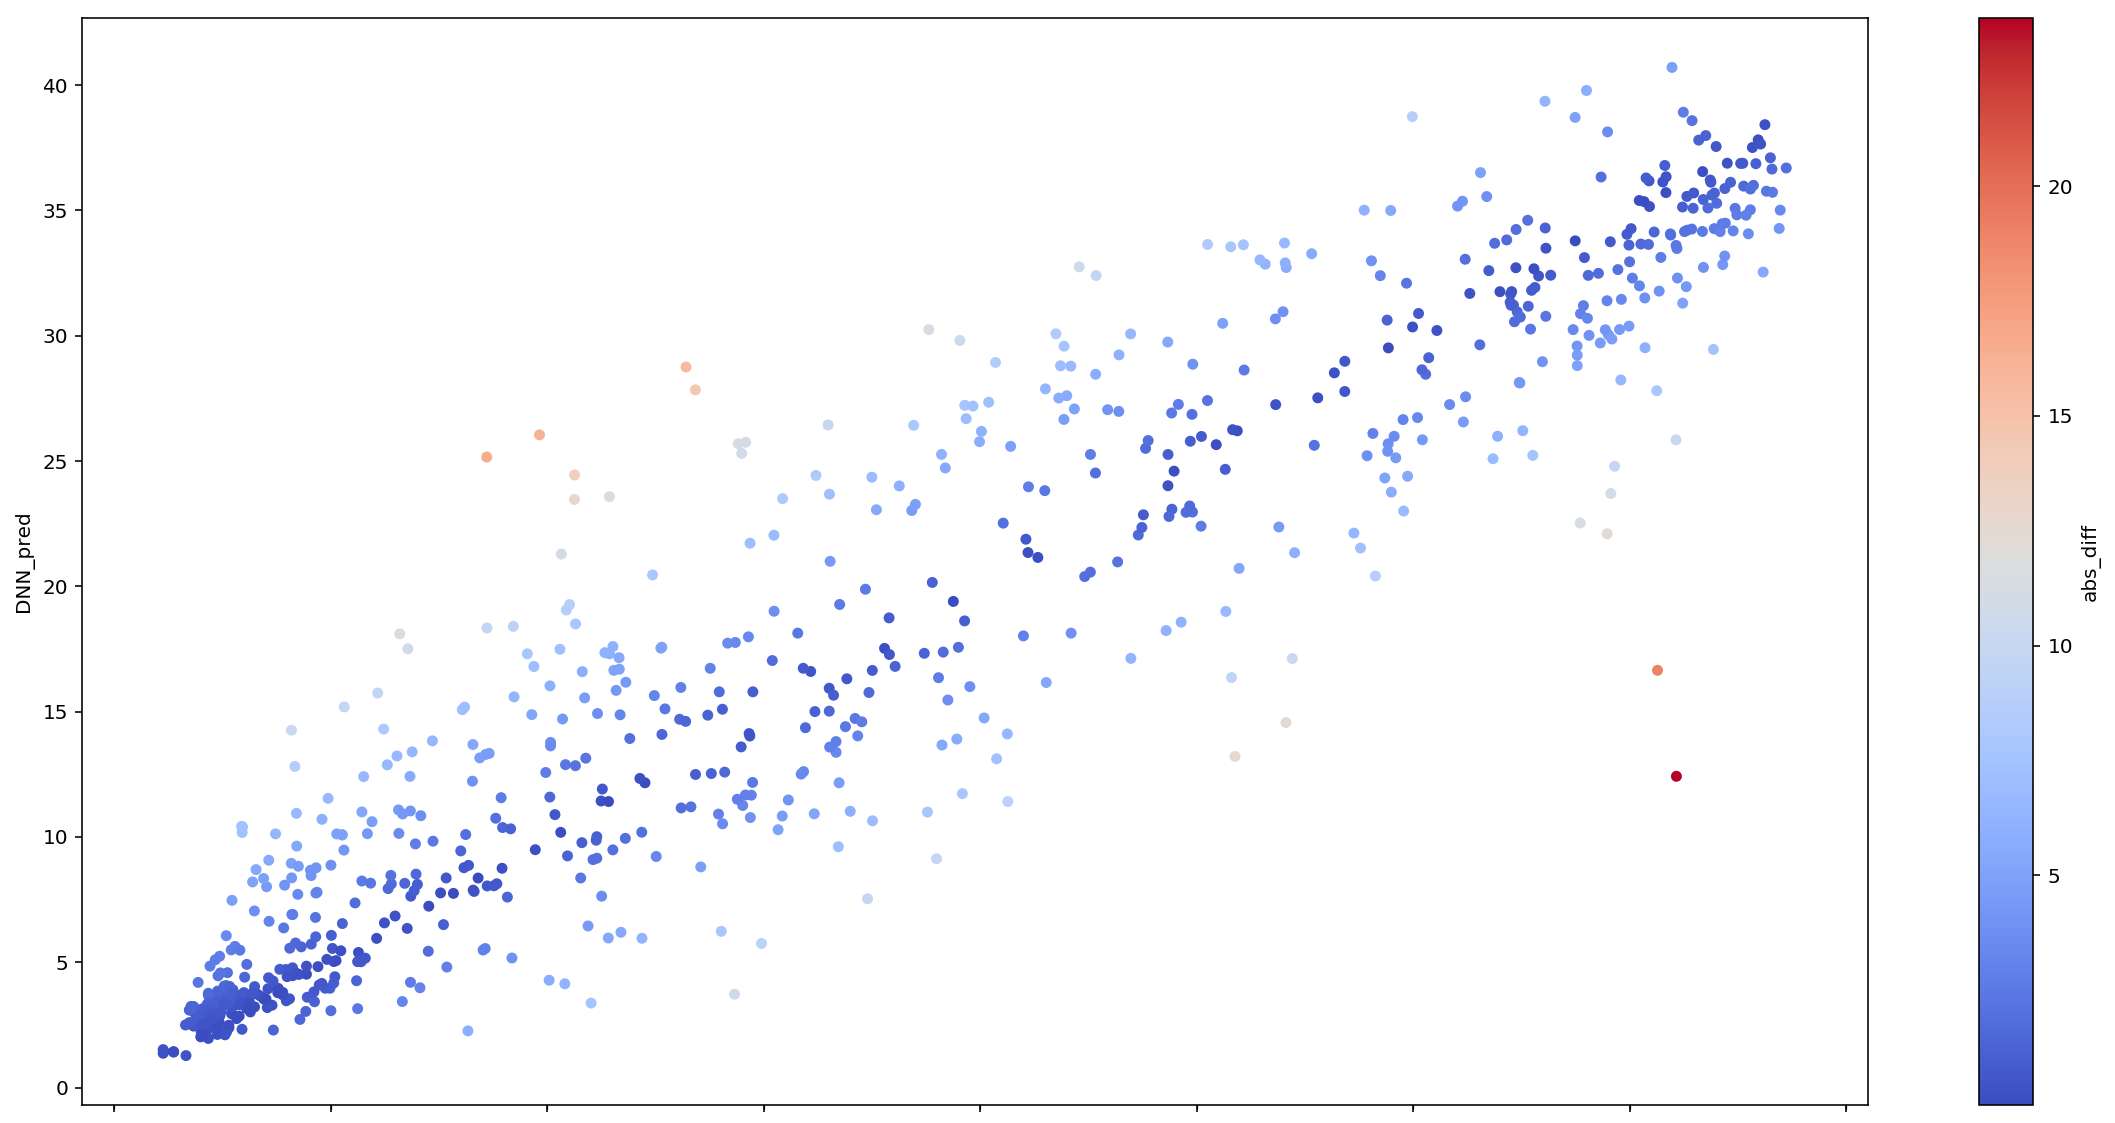

In [99]:
ax = comp.plot.scatter(x='real',y='DNN_pred',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

fig = ax.get_figure()
fig.savefig('dense_neural_network.png')